## Loading basic Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Testing Hypotheses

In [2]:
%%R

require('tidyverse')


# turn am into a factor
mtcars$am <- factor(mtcars$am, labels=c('automatic', 'manual'))
mtcars$vs <- factor(mtcars$vs, labels=c('v-shaped', 'straight'))
mtcars$cyl <- factor(mtcars$cyl)


my_theme <- theme_minimal() + 
    theme(plot.title = element_text(size=25),
          legend.position='bottom',
          legend.title=element_blank())


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Part 1 | mtcars

## $H_{0}$ = Null Hypothesis: 

- Automatic cars and manual cars are, on average, equally fuel efficient

in other words

- Automatic cars and manual cars come from **the same** distribution.

in other words

- One mean will do a better job of describing these two subsets of data than two (or more) means 

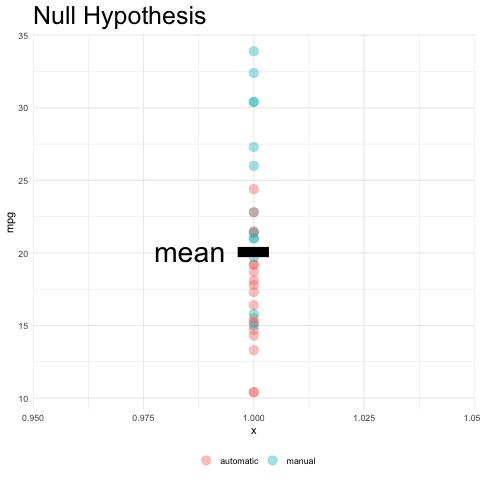

In [3]:
%%R -o mtcars

ggplot(mtcars) +
    aes(x=1, y=mpg, color=factor(am)) +
    geom_point(size=4, alpha=.4) +
    stat_summary(fun=mean, shape='-', color='black', size=10) +
    stat_summary(fun=mean, geom='text', hjust=1.4, aes(label='mean'), color='black', size=10) +
    my_theme +
    labs(title="Null Hypothesis")

In [5]:
# python cell
df = mtcars[['mpg']]
df['mean'] = df.mpg.mean().round(2)
df['std']  = df.mpg.std().round(2)
df['error'] = df['mpg'] - df['mean']
df['z_score'] =  df['error'] / df['std']
df['sq_error'] = df['error'] ** 2


df.sort_values(by='sq_error', ascending=False).round(2).head()

,mpg,mean,std,error,z_score,sq_error
Toyota Corolla,33.9,20.09,6.03,13.81,2.29,190.72
Fiat 128,32.4,20.09,6.03,12.31,2.04,151.54
Honda Civic,30.4,20.09,6.03,10.31,1.71,106.30
Lotus Europa,30.4,20.09,6.03,10.31,1.71,106.30
Lincoln Continental,10.4,20.09,6.03,-9.69,-1.61,93.90


### Sum of squared errors
Sum of squared errors (SSE) = $\sum_{i=1}^{n}(x_i-y_i)^2$

In [129]:
print("Sum of squared errors (SSE) is", df.sq_error.sum().round(2))


Sum of squared errors (SSE) is 1126.05


### Mean of squared errors

MSE = $\frac{SSE}{N}$


In [132]:
print("Mean of squared errors (MSE) is", df.sq_error.mean().round(2))

Mean of squared errors (MSE) is 35.19


### Root mean squared error

RMSE = $\sqrt{MSE}$


In [136]:
print("Root mean squared error (RMSE) is", np.sqrt(df.sq_error.mean()).round(2), "mpg") # aka RMSD (like stdev, but for error)

Root mean squared error (RMSE) is 5.93 mpg


## Some other hypotheses

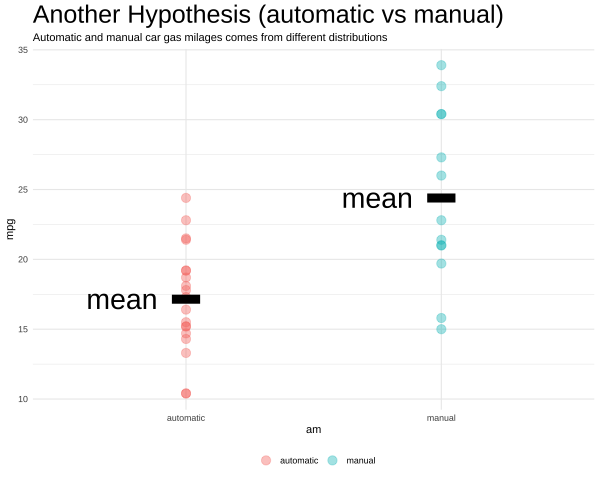

In [40]:
%%R -w 600


ggplot(mtcars) +
    aes(x=am, y=mpg, color=factor(am)) +
    geom_point(size=4, alpha=.4) +
    stat_summary(fun=mean, geom='text', hjust=1.4, aes(label='mean'), color='black', size=10) +
    stat_summary(fun=mean, shape='-', color='black', size=10) +
    labs(title="Another Hypothesis (automatic vs manual)",
        subtitle="Automatic and manual car gas milages comes from different distributions") +
    my_theme

In [7]:
mean_mpg_by_am = pd.DataFrame(
    mtcars.groupby('am').mpg.mean()
).reset_index().round(1)

mean_mpg_by_am

,am,mpg
0,automatic,17.1
1,manual,24.4


In [8]:
df_alt = mtcars[['mpg', 'am']]
df_alt = df_alt.merge(mean_mpg_by_am, on='am', how='inner', suffixes=('','_mean'))
df_alt['error'] = df_alt.mpg - df_alt.mpg_mean
df_alt['sq_error'] = df_alt['error'] ** 2
df_alt.head()

,mpg,am,mpg_mean,error,sq_error
0,21.0,manual,24.4,-3.4,11.56
1,21.0,manual,24.4,-3.4,11.56
2,22.8,manual,24.4,-1.6,2.56
3,32.4,manual,24.4,8.0,64.00
4,30.4,manual,24.4,6.0,36.00


In [9]:
print("Sum of squared errors (SSE) is", df_alt.sq_error.sum().round(2))
print("Mean of squared errors (MSE) is", df_alt.sq_error.mean().round(2))
print("Root mean squared error (RMSE) is", np.sqrt(df_alt.sq_error.mean()).round(2), "mpg") # aka RMSD (like stdev, but for error)

Sum of squared errors (SSE) is 720.94
Mean of squared errors (MSE) is 22.53
Root mean squared error (RMSE) is 4.75 mpg


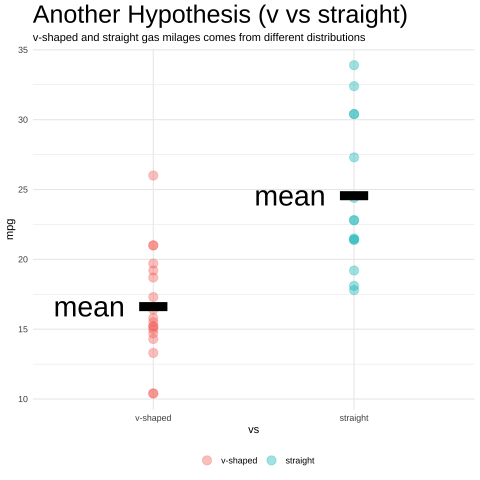

In [53]:
%%R 


ggplot(mtcars) +
    aes(x=vs, y=mpg, color=factor(vs)) +
    geom_point(size=4, alpha=.4) +
    stat_summary(fun=mean, geom='text', hjust=1.4, aes(label='mean'), color='black', size=10) +
    stat_summary(fun=mean, shape='-', color='black', size=10) +
    labs(title="Another Hypothesis (v vs straight)",
        subtitle="v-shaped and straight gas milages comes from different distributions") +
    my_theme

In [71]:
mean_mpg_by_vs = pd.DataFrame(
    mtcars.groupby('vs').mpg.mean()
).reset_index().round(1)

mean_mpg_by_vs

,vs,mpg
0,v-shaped,16.6
1,straight,24.6


In [73]:
df_alt_vs = mtcars[['mpg', 'vs']]
df_alt_vs = df_alt_vs.merge(mean_mpg_by_vs, on='vs', how='inner', suffixes=('','_mean'))
df_alt_vs['error'] = df_alt_vs.mpg - df_alt_vs.mpg_mean
df_alt_vs['sq_error'] = df_alt_vs['error'] ** 2
df_alt_vs.head()

,mpg,vs,mpg_mean,error,sq_error
0,21.0,v-shaped,16.6,4.4,19.36
1,21.0,v-shaped,16.6,4.4,19.36
2,18.7,v-shaped,16.6,2.1,4.41
3,14.3,v-shaped,16.6,-2.3,5.29
4,16.4,v-shaped,16.6,-0.2,0.04


In [74]:
print("Sum of squared errors (SSE) is", df_alt_vs.sq_error.sum().round(2))
print("Mean of squared errors (MSE) is", df_alt_vs.sq_error.mean().round(2))
print("Root mean squared error (RMSE) is", np.sqrt(df_alt_vs.sq_error.mean()).round(2), "mpg") # aka RMSD (like stdev, but for error)

Sum of squared errors (SSE) is 629.55
Mean of squared errors (MSE) is 19.67
Root mean squared error (RMSE) is 4.44 mpg


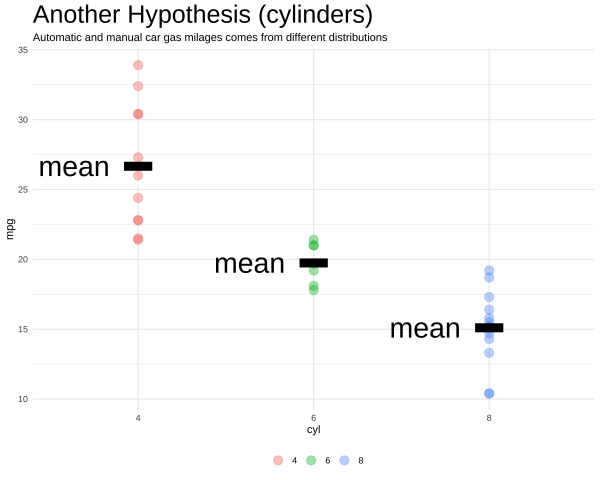

In [75]:
%%R -w 600


ggplot(mtcars) +
    aes(x=cyl, y=mpg, color=factor(cyl)) +
    geom_point(size=4, alpha=.4) +
    stat_summary(fun=mean, geom='text', hjust=1.4, aes(label='mean'), color='black', size=10) +
    stat_summary(fun=mean, shape='-', color='black', size=10) +
    labs(title="Another Hypothesis (cylinders)",
        subtitle="Automatic and manual car gas milages comes from different distributions") +
    my_theme

In [76]:
mean_mpg_by_cyl = pd.DataFrame(
    mtcars.groupby('cyl').mpg.mean()
).reset_index().round(1)

mean_mpg_by_cyl

,cyl,mpg
0,4,26.7
1,6,19.7
2,8,15.1


In [77]:
df_alt_cyl = mtcars[['mpg', 'cyl', 'am']]
df_alt_cyl = df_alt_cyl.merge(mean_mpg_by_cyl, on='cyl', how='inner', suffixes=('','_mean'))
df_alt_cyl['error'] = df_alt_cyl.mpg - df_alt_cyl.mpg_mean
df_alt_cyl['sq_error'] = df_alt_cyl['error'] ** 2
df_alt_cyl.head()

,mpg,cyl,am,mpg_mean,error,sq_error
0,21.0,6,manual,19.7,1.3,1.69
1,21.0,6,manual,19.7,1.3,1.69
2,21.4,6,automatic,19.7,1.7,2.89
3,18.1,6,automatic,19.7,-1.6,2.56
4,19.2,6,automatic,19.7,-0.5,0.25


In [78]:
print("Sum of squared errors (SSE) is", df_alt_cyl.sq_error.sum().round(2))
print("Mean of squared errors (MSE) is", df_alt_cyl.sq_error.mean().round(2))
print("Root mean squared error (RMSE) is", np.sqrt(df_alt_cyl.sq_error.mean()).round(2), "mpg") # aka RMSD (like stdev, but for error)

Sum of squared errors (SSE) is 301.29
Mean of squared errors (MSE) is 9.42
Root mean squared error (RMSE) is 3.07 mpg


## $H_{a}$ = Alternate Hypothesis: 

Note that the alternative hypothesis is just the hypothesis that says the null hypothesis is not true.

So it is that the data **does not** come from one mean, but it doesn't make any claims about what distributions the data does come from.

That is why we either

* Reject the null hypothesis 

or

* Fail to reject the null hypothesis

### Comparison

In [80]:

def summary_stats(df):
    print("Sum of squared errors (SSE) is", df.sq_error.sum().round(2))
    print("Mean of squared errors (MSE) is", df.sq_error.mean().round(2))
    print("Root mean squared error (RMSE) is", np.sqrt(df.sq_error.mean()).round(2), "mpg") # aka RMSD (like stdev, but for error)

print("Null Hypothesis")
summary_stats(df)

print("\nAlt Hypothesis 1 (am)")
summary_stats(df_alt)

print("\nAlt Hypothesis 2 (vs)")
summary_stats(df_alt_vs)

print("\nAlt Hypothesis 3 (cyl)")
summary_stats(df_alt_cyl)

Null Hypothesis
Sum of squared errors (SSE) is 1126.05
Mean of squared errors (MSE) is 35.19
Root mean squared error (RMSE) is 5.93 mpg

Alt Hypothesis 1 (am)
Sum of squared errors (SSE) is 720.94
Mean of squared errors (MSE) is 22.53
Root mean squared error (RMSE) is 4.75 mpg

Alt Hypothesis 2 (vs)
Sum of squared errors (SSE) is 629.55
Mean of squared errors (MSE) is 19.67
Root mean squared error (RMSE) is 4.44 mpg

Alt Hypothesis 3 (cyl)
Sum of squared errors (SSE) is 301.29
Mean of squared errors (MSE) is 9.42
Root mean squared error (RMSE) is 3.07 mpg


# ⚠️ Caution: Overfitting...

So is this the model with the best fit?

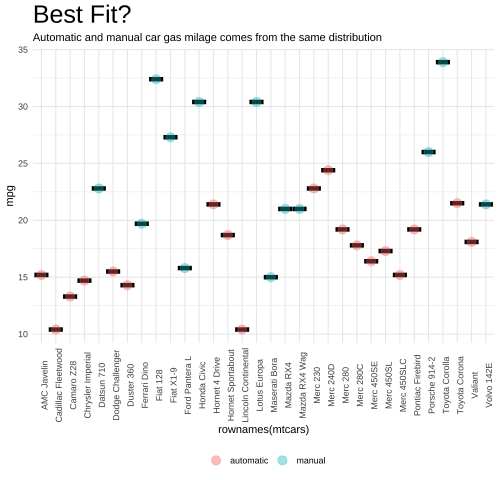

In [81]:
%%R -o mtcars -w 500

mtcars$am <- factor(mtcars$am, labels=c("automatic", "manual"))

ggplot(mtcars) +
    aes(x=rownames(mtcars), y=mpg, color=factor(am)) +
    geom_point(size=20, alpha=1, shape='-', color='black') +
    geom_point(size=4, alpha=.4) +
    labs(title="Best Fit?",
        subtitle="Automatic and manual car gas milage comes from the same distribution") +
    my_theme +
    theme(axis.text.x=element_text(angle=90))

In [82]:
print("Sum of squared errors (SSE) is 0 ")
print("Mean of squared errors (MSE) is 0")
print("Root mean squared error (RMSE) is 0")

Sum of squared errors (SSE) is 0 
Mean of squared errors (MSE) is 0
Root mean squared error (RMSE) is 0


~**Wow!** That's the best model!~ That is an **overfit** model.

# So can we reject the null hypothesis?

It certianly seems so...but how do we know this isn't due to random chance alone?

In [126]:
# RUN THIS SEVERAL TIMES!!!

# randomly sample 15 of the cars, does the hypothesis always hold up?

df_sample = df.sample(15)
print("Null Hypothesis")
summary_stats(df_sample)

df_alt_sample = df_alt.sample(15)
print("\nAlt Hypothesis 1 (am)")
summary_stats(df_alt_sample)

print("\nAlt Hypothesis 2 (vs)")
df_alt_vs_sample = df_alt_vs.sample(15)
summary_stats(df_alt_vs_sample)

print("\nAlt Hypothesis 3 (cyl)")
df_alt_cyl_sample = df_alt_cyl.sample(15)
summary_stats(df_alt_cyl_sample)

Null Hypothesis
Sum of squared errors (SSE) is 498.09
Mean of squared errors (MSE) is 33.21
Root mean squared error (RMSE) is 5.76 mpg

Alt Hypothesis 1 (am)
Sum of squared errors (SSE) is 453.77
Mean of squared errors (MSE) is 30.25
Root mean squared error (RMSE) is 5.5 mpg

Alt Hypothesis 2 (vs)
Sum of squared errors (SSE) is 274.48
Mean of squared errors (MSE) is 18.3
Root mean squared error (RMSE) is 4.28 mpg

Alt Hypothesis 3 (cyl)
Sum of squared errors (SSE) is 134.15
Mean of squared errors (MSE) is 8.94
Root mean squared error (RMSE) is 2.99 mpg


# T-Test

Pay attention to the **p-value**!
https://en.wikipedia.org/wiki/P-value

- The p-value is a number between 0 and 1

- If they're very small (close to 0)...that means it is unlikely that this effect is due to random chance. 
- If they're very big (close to 1)...that means this is very likely to be due to chance alone

Think of it as a percentage. 0 is "this is definitely not due to chance" and 1 is "this is definitely due to chance". 

... except it will always be somewhere in between


In [120]:
%%R 

mtcars_a = mtcars %>% filter(am=='automatic')
mtcars_m = mtcars %>% filter(am=='manual')

t.test(mtcars_a$mpg, mtcars_m$mpg)


	Welch Two Sample t-test

data:  mtcars_a$mpg and mtcars_m$mpg
t = -3.7671, df = 18.332, p-value = 0.001374
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.280194  -3.209684
sample estimates:
mean of x mean of y 
 17.14737  24.39231 



In [9]:
%%R 

# Split into two random groups and run a t-test

mtcars$random <- sample(c(0,1), replace=TRUE, size=nrow(mtcars))
mtcars_random_0 <- mtcars %>% filter(random==0)
mtcars_random_1 <- mtcars %>% filter(random==1)

t.test(mtcars_random_0$mpg, mtcars_random_1$mpg)


	Welch Two Sample t-test

data:  mtcars_random_0$mpg and mtcars_random_1$mpg
t = 0.16185, df = 21.202, p-value = 0.873
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.407806  5.152251
sample estimates:
mean of x mean of y 
 20.30000  19.92778 



# P-value

You'll learn more about these in tonight's StatQuest!

In [124]:
%%R 

p_values <- c()
for (x in 1:1000) {


    mtcars$random <- sample(c(0,1), replace=TRUE, size=nrow(mtcars))
    mtcars_0 <- mtcars %>% filter(random==0)
    mtcars_1 <- mtcars %>% filter(random==1)


    p_value <- (t.test(mtcars_0$mpg, mtcars_1$mpg)$p.value)
    p_values <- append(p_values, p_value)
}

p_values <- data.frame(p_values)

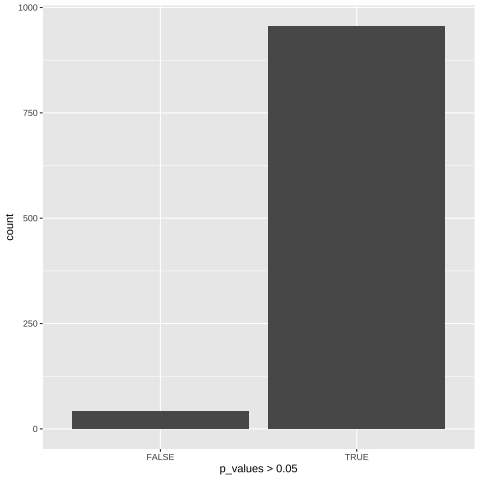

In [125]:
%%R

ggplot(p_values) + 
    aes(x=p_values > .05)+ 
    geom_bar()

## Part 2 | Last Year's Polly (Anonymized)


### 👉 Question 2: Are Dhrumil's students more stressed than Irena's?

In [24]:
%%R

# read some functions from the functions.R file
source('functions.R')

In [25]:
%%R -o q_emotions

q_emotions <- read_csv('emotion.csv', show_col_types = FALSE) %>% 
        mutate(date=as.Date(date), 
        emoji = factor(emoji, levels=c('😍', '🙂', '😐', '🙁', '😢'))) 

q_emotions


# A tibble: 585 × 6
   date       user_id                          choice_id emoji question editor 
   <date>     <chr>                                <dbl> <fct> <chr>    <chr>  
 1 2022-05-13 aa516cd83ca47c4c0707d31047f6dc8a         2 😍    emotion  Dhrumil
 2 2022-05-13 5a7ac9a0ee30d1e7bedafd9046162fc7         1 🙂    emotion  Dhrumil
 3 2022-05-13 fb6da81da7c9b66f4dfd266096bca702         2 😍    emotion  Dhrumil
 4 2022-05-13 f2dfc7b67a37987df95bd920a81a5cd3         1 🙂    emotion  Irena  
 5 2022-05-13 764f85855c5a57c62401a0834eda0fc9         1 🙂    emotion  Dhrumil
 6 2022-05-13 95ba860ed905cf268092ca1e90f91dd6         2 😍    emotion  Irena  
 7 2022-05-13 3ce992bb73ea135b1c738ef290cb93d5         2 😍    emotion  Dhrumil
 8 2022-05-13 c21a2438c0e9308e03a92ebd90c5d27d         0 😐    emotion  Dhrumil
 9 2022-05-13 89135d5c75496c9d94251f30c748b9b8        -2 😢    emotion  Irena  
10 2022-05-13 5119dd707d353a28b41fa1adcdda76be         2 😍    emotion  Dhrumil
# … with 575 more rows
# ℹ Use

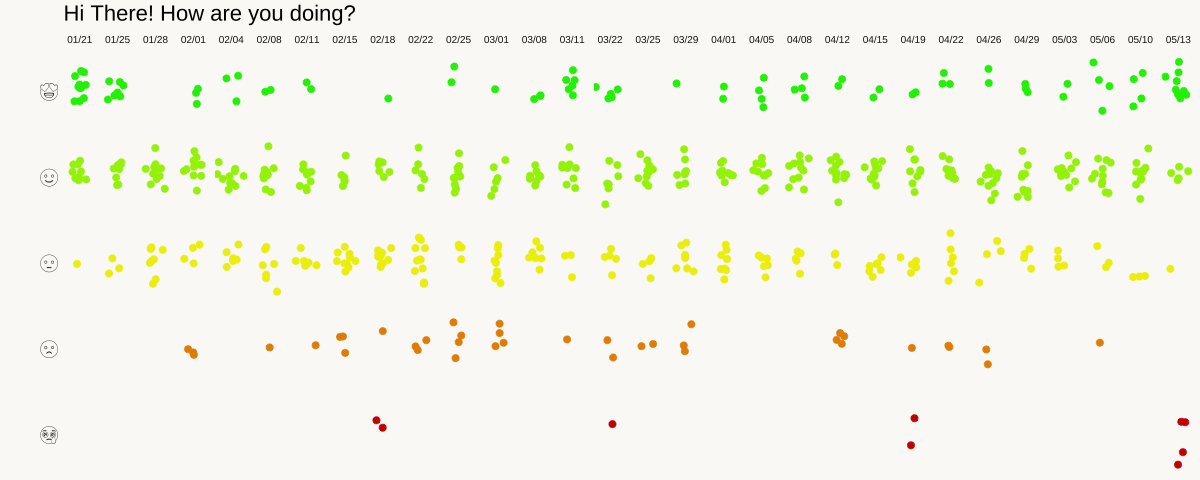

In [26]:
%%R -w 1200

plot_type_1(q_emotions)

In [27]:
q_emotions = pd.read_csv('emotion.csv', parse_dates=['date'])
q_emotions

,date,user_id,choice_id,emoji,question,editor
0,2022-05-13,aa516cd83ca47c4c0707d31047f6dc8a,2,😍,emotion,Dhrumil
1,2022-05-13,5a7ac9a0ee30d1e7bedafd9046162fc7,1,🙂,emotion,Dhrumil
2,2022-05-13,fb6da81da7c9b66f4dfd266096bca702,2,😍,emotion,Dhrumil
3,2022-05-13,f2dfc7b67a37987df95bd920a81a5cd3,1,🙂,emotion,Irena
4,2022-05-13,764f85855c5a57c62401a0834eda0fc9,1,🙂,emotion,Dhrumil
...,...,...,...,...,...,...
580,2022-01-21,aa516cd83ca47c4c0707d31047f6dc8a,2,😍,emotion,Dhrumil
581,2022-01-21,4716f7a2eee28bddd0e115f021642950,2,😍,emotion,Dhrumil
582,2022-01-21,8b728352298677976121c9bcf5f2a578,1,🙂,emotion,Irena
583,2022-01-21,5a7ac9a0ee30d1e7bedafd9046162fc7,1,🙂,emotion,Dhrumil


In [28]:
# hint: try a pivot table (or a group by)

### 👉 Question 3: Do Dhrumil's students have a heavier workload than Irena's?

In [29]:
%%R 

q_workload <- read_csv('workload.csv', show_col_types = FALSE)
q_workload

# A tibble: 543 × 5
   date       user_id                          choice_id question editor 
   <date>     <chr>                                <dbl> <chr>    <chr>  
 1 2022-05-13 aa516cd83ca47c4c0707d31047f6dc8a         2 workload Dhrumil
 2 2022-05-13 5a7ac9a0ee30d1e7bedafd9046162fc7         4 workload Irena  
 3 2022-05-13 fb6da81da7c9b66f4dfd266096bca702         6 workload Dhrumil
 4 2022-05-13 f2dfc7b67a37987df95bd920a81a5cd3         3 workload Dhrumil
 5 2022-05-13 764f85855c5a57c62401a0834eda0fc9         4 workload Dhrumil
 6 2022-05-13 95ba860ed905cf268092ca1e90f91dd6         2 workload Irena  
 7 2022-05-13 3ce992bb73ea135b1c738ef290cb93d5         5 workload Irena  
 8 2022-05-13 c21a2438c0e9308e03a92ebd90c5d27d         4 workload Irena  
 9 2022-05-13 a9864a7d130ce52cf17579545fc96643         5 workload Dhrumil
10 2022-05-13 5119dd707d353a28b41fa1adcdda76be         1 workload Dhrumil
# … with 533 more rows
# ℹ Use `print(n = ...)` to see more rows


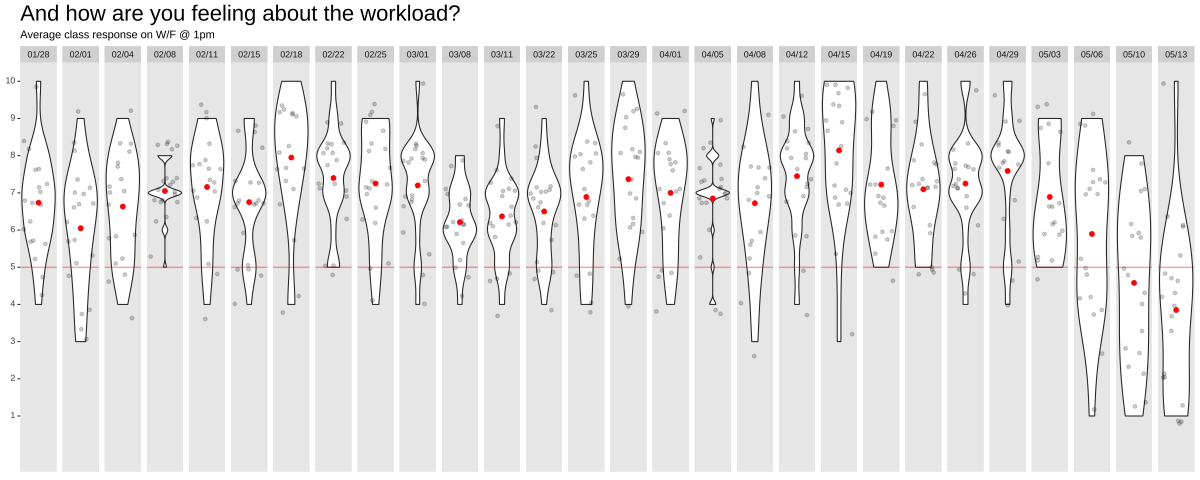

In [30]:
%%R -w 1200

# Data at a glance
plot_type_2(q_workload)

In [31]:
q_workload = pd.read_csv('workload.csv', parse_dates=['date'])
q_workload

,date,user_id,choice_id,question,editor
0,2022-05-13,aa516cd83ca47c4c0707d31047f6dc8a,2,workload,Dhrumil
1,2022-05-13,5a7ac9a0ee30d1e7bedafd9046162fc7,4,workload,Irena
2,2022-05-13,fb6da81da7c9b66f4dfd266096bca702,6,workload,Dhrumil
3,2022-05-13,f2dfc7b67a37987df95bd920a81a5cd3,3,workload,Dhrumil
4,2022-05-13,764f85855c5a57c62401a0834eda0fc9,4,workload,Dhrumil
...,...,...,...,...,...
538,2022-01-28,5119dd707d353a28b41fa1adcdda76be,6,workload,Dhrumil
539,2022-01-28,b049b7eae43713e6aca6320c57b3bb88,8,workload,Irena
540,2022-01-28,5a7ac9a0ee30d1e7bedafd9046162fc7,6,workload,Irena
541,2022-01-28,2ab5e1542adfb5cbd739a0e443d7408b,5,workload,Irena


In [32]:
# hint: try a pivot table (or a group by)

# Pollster Ratings

### 👉 Question 4: Are Gubernatorial Polls More Accurate Than Senate Polls?

In [33]:
%%R

s_g_polls <- read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/pollster-ratings/raw-polls.csv', show_col_types = FALSE) %>% 
    filter(type_detail %in% c('Gov-G', 'Sen-G')) %>%
    filter(location != 'US')
    
s_g_polls


# A tibble: 4,014 × 33
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G   Sen-G   Garin-…     113
 6   26255     31495    1741  1998 1998… OH      Sen-G   Sen-G   Univer…     346
 7   54202     87738    1435  1998 1998… AZ      Gov-G   Gov-G   Behavi…      27
 8   54291     87827    1443  1998 1998… IL      Gov-G   Gov-G   WCIA-TV     373
 9   54273     87809    1444  1998 1998… IA      Gov-G   Gov-G   Drake …     329
10   54346     87882    1451  1998 1998… NE      Gov-G   Gov-G   Mason-…     197
# … w

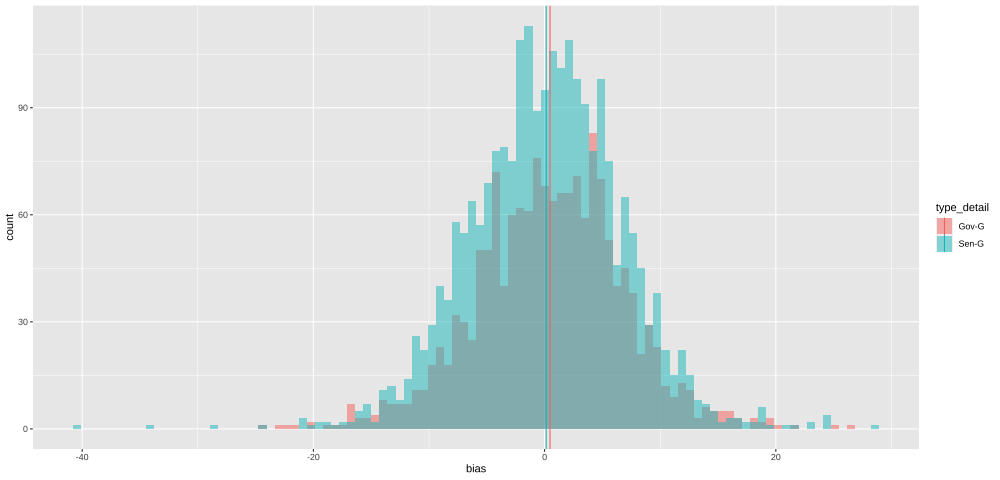

In [34]:
%%R -w 1000

mean_bias <- s_g_polls %>% 
filter(!is.na(bias)) %>%
    group_by(type_detail) %>% 
    summarise(bias=mean(bias))

ggplot(s_g_polls) +
    aes(x=bias, fill=type_detail) +
    geom_histogram(alpha=.5, bins=100, position='identity') +
    geom_vline(data=mean_bias, aes(xintercept=bias, color=type_detail))

In [35]:
s_g_polls = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/pollster-ratings/raw-polls.csv') \
    .query("type_detail.isin(['Gov-G', 'Sen-G'])")\
    .query("location!='US'")           

s_g_polls

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,...,-31.0,11/3/1998,33.16,54.32,-21.15,9.85,-9.85,1.0,1.461561,for New York Daily News | WABC-TV (New York)
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,...,-15.0,11/3/1998,44.69,50.05,-5.36,9.64,-9.64,1.0,4.285789,NaN
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,...,5.0,11/3/1998,47.86,47.77,0.09,4.91,4.91,1.0,-1.023784,for unspecified Democratic sponsor
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,...,-8.0,11/3/1998,54.62,44.08,10.54,18.54,-18.54,0.0,10.064104,for New York Daily News | WABC-TV (New York)
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,...,4.0,11/3/1998,54.62,44.08,10.54,6.54,-6.54,1.0,-1.972391,for Charles E. Schumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,72624,136296,6280,2020,2020_Sen-G_MI,MI,Sen-G,Sen-G,Research Co.,449,...,15.0,11/3/2020,49.90,48.22,1.69,13.31,13.31,1.0,8.305356,NaN
10726,72625,136297,6281,2020,2020_Sen-G_MN,MN,Sen-G,Sen-G,Research Co.,449,...,11.0,11/3/2020,48.74,43.50,5.24,5.76,5.76,1.0,1.249939,NaN
10727,72626,136298,6287,2020,2020_Sen-G_NJ,NJ,Sen-G,Sen-G,Research Co.,449,...,23.0,11/3/2020,57.23,40.92,16.31,6.69,6.69,1.0,0.357477,NaN
10728,72864,140394,6292,2020,2020_Sen-G_SC,SC,Sen-G,Sen-G,Optimus,245,...,-9.8,11/3/2020,44.17,54.44,-10.27,0.47,0.47,1.0,-6.938997,NaN
